#Import All the Modules

In [24]:
# other imports
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
import keras_preprocessing
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


#Preprocessing the Data

In [6]:
# Load in the data
Train_Dataset=tf.keras.datasets.cifar10
Train_Dataset = Train_Dataset.load_data()

cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


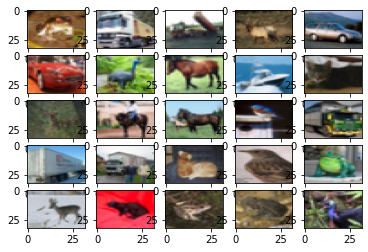

In [4]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


#Model Implementation

In [5]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                       

In [6]:

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#Implementing the Callbacks

from keras.callbacks import ModelCheckpoint
filepath = '/content/logs/model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

#ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

#EarlyStopping
checkpoint1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

#ReduceLRONPlateau
checkpoint2 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [8]:
from gc import callbacks
callbacks = [checkpoint,checkpoint1,checkpoint2]

In [9]:

# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=20,callbacks=callbacks)

Epoch 1/20
1563/1563 [==============================] - ETA: 0s - loss: 1.6572 - accuracy: 0.3834
Epoch 1: val_loss improved from inf to 1.27427, saving model to /content/logs/model.epoch01-loss1.27.hdf5
1563/1563 [==============================] - 461s 294ms/step - loss: 1.6572 - accuracy: 0.3834 - val_loss: 1.2743 - val_accuracy: 0.5299 - lr: 0.0010
Epoch 2/20
1563/1563 [==============================] - ETA: 0s - loss: 1.2398 - accuracy: 0.5510
Epoch 2: val_loss improved from 1.27427 to 1.11868, saving model to /content/logs/model.epoch02-loss1.12.hdf5
1563/1563 [==============================] - 456s 292ms/step - loss: 1.2398 - accuracy: 0.5510 - val_loss: 1.1187 - val_accuracy: 0.6055 - lr: 0.0010
Epoch 3/20
1563/1563 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.6194
Epoch 3: val_loss improved from 1.11868 to 1.04088, saving model to /content/logs/model.epoch03-loss1.04.hdf5
1563/1563 [==============================] - 455s 291ms/step - loss: 1.0718 - ac

In [17]:
#Save the model

model.save('/content/Model/CNNMODEL.h5')

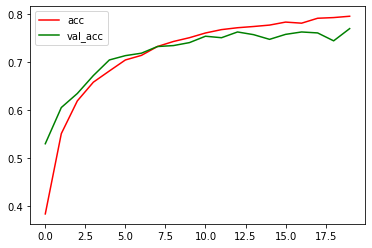

In [10]:

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

#Predicting Test Images based on labels

Original label is cat and predicted label is dog
Original label is ship and predicted label is ship
Original label is ship and predicted label is ship
Original label is airplane and predicted label is ship
Original label is frog and predicted label is frog


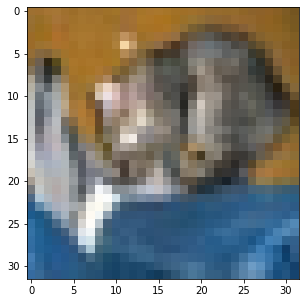

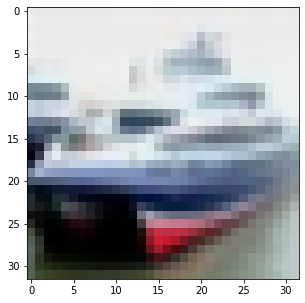

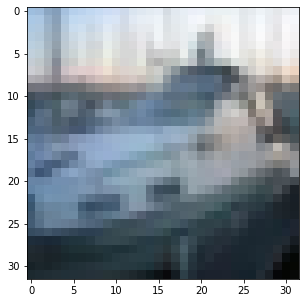

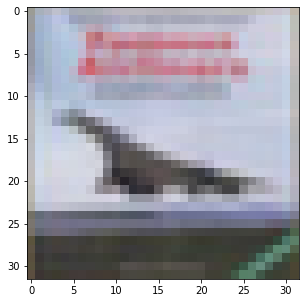

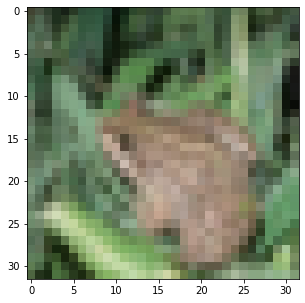

In [25]:
# label mapping

labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

# select the image from our test dataset
image_number = 0
for image_number in range(5):
# display the image
  plt.figure(figsize=(5, 5))
  

# load the image in an array
  n = np.array(x_test[image_number])

# reshape it
  p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
  predicted_label = labels[model.predict(p).argmax()]

# load the original label
  original_label = labels[y_test[image_number]]

# display the result
  plt.imshow(x_test[image_number])
  print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))
  


#Image Classification on Custom Data Set

In [11]:
(x_train, y_train), (x_test, y_test) = Train_Dataset[:1000]

x_train=x_train[0:10000]
y_train=y_train[0:10000]
x_test=x_test[0:1000]
y_test=y_test[0:1000]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(10000, 32, 32, 3) (10000, 1) (1000, 32, 32, 3) (1000, 1)


In [12]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [13]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                       

In [14]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Implementing the Callbacks

from keras.callbacks import ModelCheckpoint
filepath = '/content/logs/model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

#ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

#EarlyStopping
checkpoint1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

#ReduceLRONPlateau
checkpoint2 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [16]:
from gc import callbacks
callbacks = [checkpoint,checkpoint1,checkpoint2]

In [17]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=20,callbacks=callbacks)

Epoch 1/20
313/313 [==============================] - ETA: 0s - loss: 2.1202 - accuracy: 0.1971
Epoch 1: val_loss improved from inf to 1.99475, saving model to /content/logs/model.epoch01-loss1.99.hdf5
313/313 [==============================] - 93s 293ms/step - loss: 2.1202 - accuracy: 0.1971 - val_loss: 1.9948 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 2/20
313/313 [==============================] - ETA: 0s - loss: 1.7713 - accuracy: 0.3395
Epoch 2: val_loss improved from 1.99475 to 1.65986, saving model to /content/logs/model.epoch02-loss1.66.hdf5
313/313 [==============================] - 92s 293ms/step - loss: 1.7713 - accuracy: 0.3395 - val_loss: 1.6599 - val_accuracy: 0.3900 - lr: 0.0010
Epoch 3/20
313/313 [==============================] - ETA: 0s - loss: 1.5779 - accuracy: 0.4122
Epoch 3: val_loss improved from 1.65986 to 1.51790, saving model to /content/logs/model.epoch03-loss1.52.hdf5
313/313 [==============================] - 92s 293ms/step - loss: 1.5779 - accuracy: 0.4122 

In [18]:
#Save the model

model.save('/content/Model/CNNMODEL_Newdataset.h5')

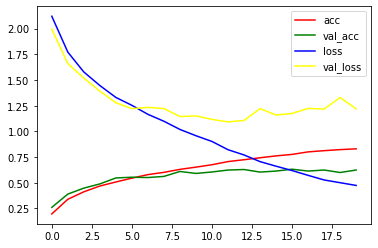

In [30]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.plot(r.history['loss'], label='loss', color='blue')
plt.plot(r.history['val_loss'], label='val_loss', color='yellow')
plt.legend()

In [39]:
predict = model.predict(x_test)
print(predict)

# Converting the predictions into label index 
predLabel = np.argmax(predict, axis=1)
#print(predLabel)

[[2.7352787e-04 1.1651834e-03 1.1874153e-02 ... 1.5599194e-02
  4.7912337e-02 1.7632385e-04]
 [1.7171698e-02 7.7802017e-02 7.9263685e-07 ... 4.7990582e-08
  9.0492815e-01 8.6326851e-05]
 [1.8997122e-01 2.1134347e-03 6.1660785e-02 ... 1.6876604e-02
  7.0881796e-01 4.5146844e-03]
 ...
 [7.1768957e-04 2.5970608e-02 1.5591904e-09 ... 1.4563980e-08
  9.7325814e-01 5.3556181e-05]
 [2.3124414e-07 2.3758764e-09 1.9650179e-05 ... 1.8113784e-05
  5.2043240e-05 1.6864822e-08]
 [5.4464862e-02 5.5180024e-03 6.3407538e-04 ... 2.2814711e-05
  9.2976010e-01 2.8608583e-03]]


In [40]:
#These are the 10 classes that are present in the dataset
category = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

cat


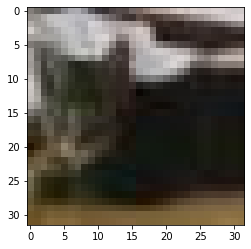

In [44]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

i1 = image.imread('/content/cat1.jpg')   
#Normalizing the image
img = i1 / 255.0  
#resizing the image to match the input size
newi1 = resize(i1, (32,32,3),)  
#Expanding dimension into 4D 
im = np.expand_dims(newi1, axis=0) 
plt.imshow(img)
#Predicting through model
keypoints = model.predict(im)   
#Printing the predicted class label
print(classes[np.argmax(keypoints)])

cat


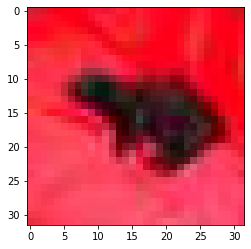

In [45]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

i1 = image.imread('/content/cat2.jpg')   
#Normalizing the image
img = i1 / 255.0  
#resizing the image to match the input size
newi1 = resize(i1, (32,32,3),)  
#Expanding dimension into 4D 
im = np.expand_dims(newi1, axis=0) 
plt.imshow(img)
#Predicting through model
keypoints = model.predict(im)   
#Printing the predicted class label
print(classes[np.argmax(keypoints)])

dog


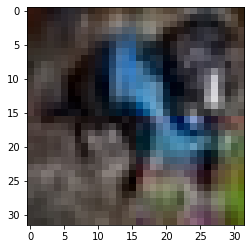

In [46]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

i1 = image.imread('/content/dog1.jpg')   
#Normalizing the image
img = i1 / 255.0  
#resizing the image to match the input size
newi1 = resize(i1, (32,32,3),)  
#Expanding dimension into 4D 
im = np.expand_dims(newi1, axis=0) 
plt.imshow(img)
#Predicting through model
keypoints = model.predict(im)   
#Printing the predicted class label
print(classes[np.argmax(keypoints)])

dog


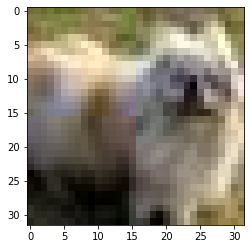

In [47]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

i1 = image.imread('/content/dog2.jpg')   
#Normalizing the image
img = i1 / 255.0  
#resizing the image to match the input size
newi1 = resize(i1, (32,32,3),)  
#Expanding dimension into 4D 
im = np.expand_dims(newi1, axis=0) 
plt.imshow(img)
#Predicting through model
keypoints = model.predict(im)   
#Printing the predicted class label
print(classes[np.argmax(keypoints)])

dog


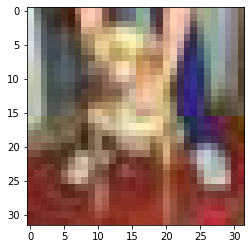

In [48]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

i1 = image.imread('/content/dog3.jpg')   
#Normalizing the image
img = i1 / 255.0  
#resizing the image to match the input size
newi1 = resize(i1, (32,32,3),)  
#Expanding dimension into 4D 
im = np.expand_dims(newi1, axis=0) 
plt.imshow(img)
#Predicting through model
keypoints = model.predict(im)   
#Printing the predicted class label
print(classes[np.argmax(keypoints)])